In [1]:
import sys
import scipy as sp
import sklearn
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
features = pd.read_csv("data/bdt_features_1.csv")
target1 = pd.read_csv("data/bdt_inverse_muon_pt_1.csv")
target2 = pd.read_csv("data/bdt_muon_pt_1.csv")

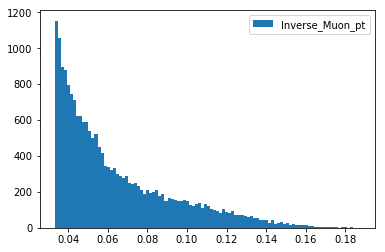

In [3]:
plt.hist(target1.IPt_Muon, bins=100, label="Inverse_Muon_pt")
plt.legend()
plt.show()

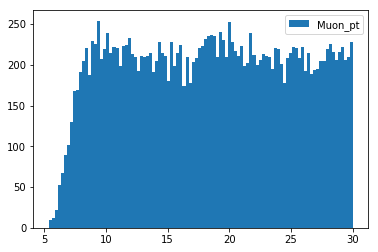

In [4]:
plt.hist(target2.Pt_Muon_Matched, bins=100, label="Muon_pt")
plt.legend()
plt.show()

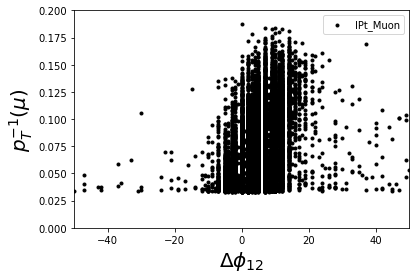

In [5]:

if features.deltaphi12.any() > -60:
    plt.scatter(features.deltaphi12, target1.IPt_Muon, color='black', marker= ".")
    #plt.plot(features.deltaphi12[features.deltaphi12 > -10], target1.IPt_Muon[features.deltaphi12 > -10], 'bo', label = 'Valid $\Delta \phi$')
    #plt.axhspan(0,100, 0, 1, alpha = 0.1)
    plt.xlabel("$\Delta \phi _{12}$",  fontsize = 20)
    plt.ylabel("$p_{T}^{-1}(\mu)$",  fontsize = 20)
    plt.xlim(-50,50)
    plt.ylim(0,0.2)
    plt.legend()
    plt.savefig('IPt_deltaphi12.eps')
    plt.show()
    


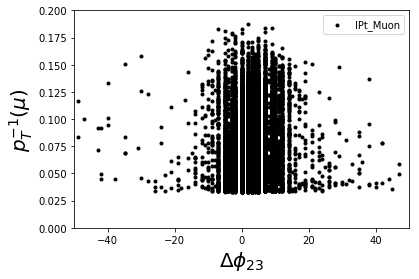

In [6]:
if features.deltaphi23.any() > -60:
    plt.scatter(features.deltaphi23, target1.IPt_Muon, color='black', marker= ".")
    #plt.plot(features.deltaphi12[features.deltaphi12 > -10], target1.IPt_Muon[features.deltaphi12 > -10], 'bo', label = 'Valid $\Delta \phi$')
    #plt.axhspan(0,100, 0, 1, alpha = 0.1)
    plt.xlabel("$\Delta \phi _{23}$",  fontsize = 20)
    plt.ylabel("$p_{T}^{-1}(\mu)$",  fontsize = 20)
    plt.xlim(-50,50)
    plt.ylim(0,0.2)
    plt.legend()
    plt.savefig('IPt_deltaphi23.eps')
    plt.show()

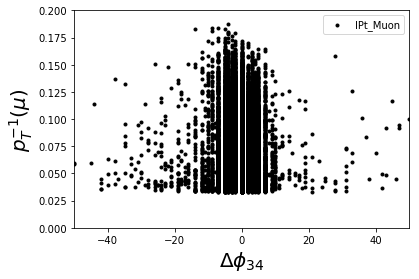

In [7]:
if features.deltaphi34.any() > -60:
    plt.scatter(features.deltaphi34, target1.IPt_Muon, color='black', marker= ".")
    #plt.plot(features.deltaphi12[features.deltaphi12 > -10], target1.IPt_Muon[features.deltaphi12 > -10], 'bo', label = 'Valid $\Delta \phi$')
    #plt.axhspan(0,100, 0, 1, alpha = 0.1)
    plt.xlabel("$\Delta \phi _{34}$",  fontsize = 20)
    plt.ylabel("$p_{T}^{-1}(\mu)$",  fontsize = 20)
    plt.xlim(-50,50)
    plt.ylim(0,0.2)
    plt.legend()
    plt.savefig('IPt_deltaphi34.eps')
    plt.show()

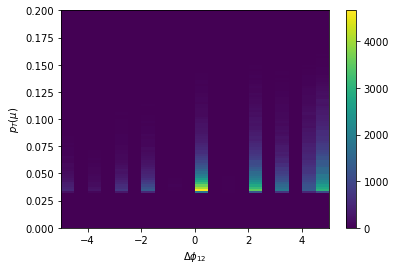

In [9]:
plt.hist2d(features.deltaphi12, target1.IPt_Muon, bins=(20,100), range=[[-5,5],[0,0.2]])
plt.xlabel('$\Delta \phi _{12}$',  fontsize = 10)
plt.ylabel('$p_{T}(\mu)$',  fontsize = 10)
plt.colorbar()
plt.show()

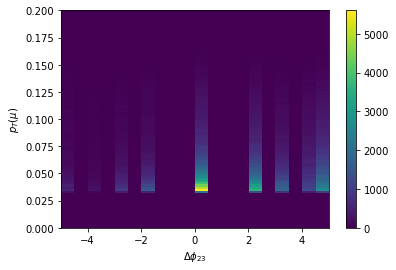

In [10]:
plt.hist2d(features.deltaphi23, target1.IPt_Muon, bins=(20,100), range=[[-5,5],[0,0.2]])
plt.xlabel('$\Delta \phi _{23}$',  fontsize = 10)
plt.ylabel('$p_{T}(\mu)$',  fontsize = 10)
plt.colorbar()
plt.show()

In [11]:
print("Keys of Features: \n{}".format(features.keys()))
print("Keys of Target1: \n{}".format(target1.keys()))
print("Keys of Target2: \n{}".format(target2.keys()))

Keys of Features: 
Index(['phi1', 'phi2', 'phi3', 'phi4', 'theta1', 'theta2', 'theta3', 'theta4',
       'deltaphi12', 'deltaphi23', 'deltaphi34', 'deltatheta12',
       'deltatheta23', 'deltatheta34', 'deltatheta14', 'cluster1', 'cluster2',
       'cluster3', 'cluster4', 'NCPPF'],
      dtype='object')
Keys of Target1: 
Index(['IPt_Muon'], dtype='object')
Keys of Target2: 
Index(['Pt_Muon_Matched'], dtype='object')


In [16]:
print("features shape: \n{}".format(features.shape))
print("target2 shape: \n{}".format(target1.shape))
print("target2 shape: \n{}".format(target2.shape))

features shape: 
(296127, 20)
target2 shape: 
(296127, 1)
target2 shape: 
(296127, 1)


In [17]:
#the sample preparation
from sklearn.model_selection import train_test_split
Data = pd.DataFrame(features)
Target = target1.IPt_Muon
X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=0.5,random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(148063, 20) (148063,)
(148064, 20) (148064,)


In [18]:
# fit a linear model
from sklearn import datasets, linear_model
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions[0:5]

array([ 0.06601947,  0.05983265,  0.06800508,  0.06645231,  0.05923748])

In [19]:
print (model.score(X_test, y_test))
print (model.score(X_train, y_train))

0.00831233545509
0.00929749509841


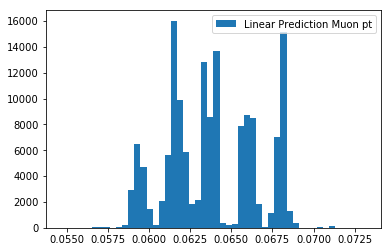

In [20]:
plt.hist(predictions, bins=50, label="Linear Prediction Muon pt")
plt.legend()
plt.show()

0.059832652904
0.0418547
148064


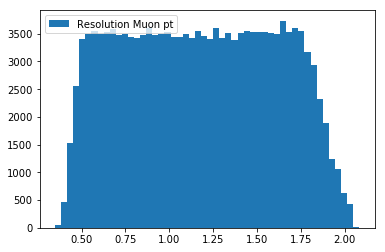

In [21]:
array1 = np.array(predictions)
array2 = np.array(y_test)
norm_array1 = array1/array2
plt.hist(norm_array1, bins=50,label="Resolution Muon pt")
plt.legend()

print(array1[1])
print(array2[1])
print (len(array1))
plt.savefig('resolution_linear.eps')
plt.show()

In [22]:
#the kneighbors
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [23]:
knn_prediction = knn.predict(X_test)
knn.score(X_train, y_train.astype(int))

0.0

In [24]:
knn.score(X_test, y_test.astype(int))

0.0

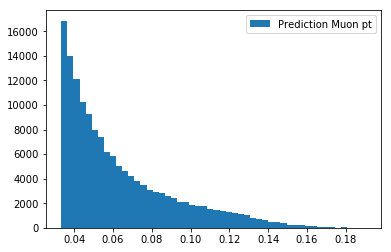

In [25]:
plt.hist(knn_prediction, bins=50, label="Prediction Muon pt")
plt.legend()
plt.show()

148064


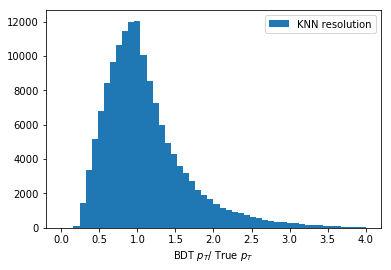

In [26]:
array1 = np.array(knn_prediction)
array2 = np.array(y_test)
norm_array1 = array1/array2
plt.hist(norm_array1, bins=50,label="KNN resolution", range=[0,4])
plt.xlabel("BDT $p_{T}$/ True $p_{T}$",  fontsize = 10)
plt.legend()

print (len(array1))
plt.savefig('resolution_knn.eps')
plt.show()

In [27]:
output = open('knn.txt','w')
 
for (x, y) in zip(array1, array2):
    output.write(str(round(x, 7))+' '+str(round(y,7))+'\n')
     
output.close()

In [28]:
ratio = array1/array2
pass_ = 0
total = 0
for x in ratio:
    total += 1
    if (x > 0.8 and x < 1.2): 
        pass_+= 1
print(pass_)
print(total, pass_/total)

54105
148064 0.36541630646207046


In [29]:
#The training
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [30]:
#prediction
prediction_tree = tree.predict(X_test)

In [31]:
tree.score(X_train, y_train.astype(int))

0.0

In [32]:
tree.score(X_test, y_test.astype(int))

0.0

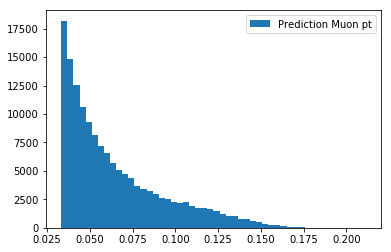

In [33]:

plt.hist(prediction_tree, bins=50, label="Prediction Muon pt")
plt.legend()
plt.show()

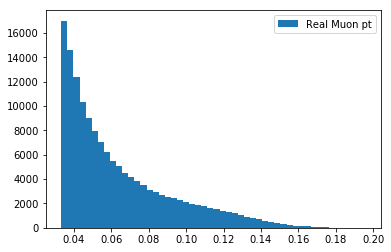

In [34]:
plt.hist(y_test, bins=50, label="Real Muon pt")
plt.legend()
plt.show()

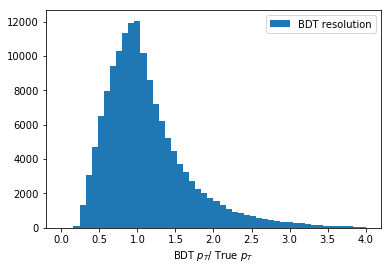

In [35]:
array1 = np.array(prediction_tree)
array2 = np.array(y_test)
plt.hist(array1/array2, bins=50,label="BDT resolution", range=[0,4])
plt.xlabel("BDT $p_{T}$/ True $p_{T}$",  fontsize = 10)
plt.legend()
plt.savefig('resolution_BDT.eps')
plt.show()

In [36]:
# a option to save without erase
output = open('BDT.txt','w')
 
for (x, y) in zip(array1, array2):
    output.write(str(round(x, 7))+' '+str(round(y,7))+'\n')
     
output.close()

In [37]:
ratio = array1/array2
pass_ = 0
total = 0
for x in ratio:
    total += 1
    if (x > 0.9 and x < 1.1): 
        pass_+= 1
print(pass_)
print(total, pass_/total)

28886
148064 0.1950913118651394


In [38]:
prediction_pt = np.array(prediction_tree)
#display(prediction_pt)
print(prediction_tree.shape)

(148064,)


In [39]:
pt = np.array(y_test)
#display(pt)
print(y_test.shape)

(148064,)


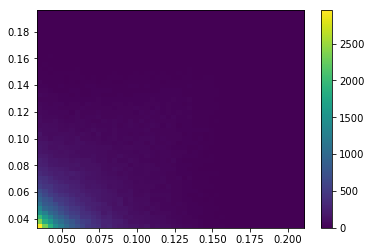

In [40]:
from matplotlib.pylab import hist
plt.hist2d(prediction_pt, pt, bins=50
           , label="Muon pt")
#plt.legend()
plt.colorbar()
plt.show()

In [41]:
#Gradient BDT
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.323
Accuracy on test set: 0.328


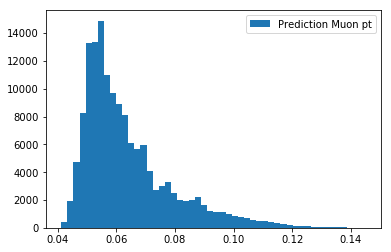

In [42]:
prediction_tree = gbrt.predict(X_test)
plt.hist(prediction_tree, bins=50, label="Prediction Muon pt")
plt.legend()
plt.show()

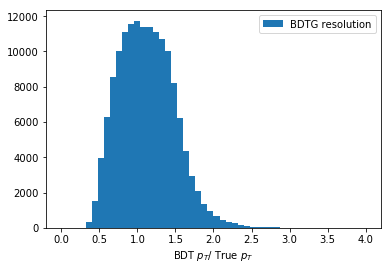

In [43]:
array1 = np.array(prediction_tree)
array2 = np.array(y_test)
plt.hist(array1/array2, bins=50,label="BDTG resolution", range=[0,4])
plt.xlabel("BDT $p_{T}$/ True $p_{T}$",  fontsize = 10)
plt.legend()

plt.savefig('resolution_BDTG.eps')
plt.show()

In [44]:
# a option to save without erase
output = open('BDTG.txt','w')
 
for (x, y) in zip(array1, array2):
    output.write(str(round(x, 7))+' '+str(round(y,7))+'\n')
     
output.close()

In [45]:
## Random Forest
from sklearn.ensemble import RandomForestRegressor

In [46]:
forest = RandomForestRegressor(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [47]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.791
Accuracy on test set: 0.126


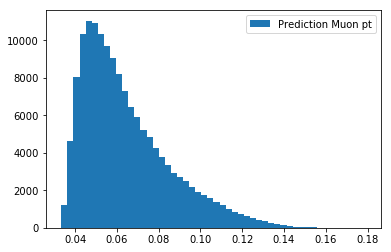

In [48]:
prediction_tree = forest.predict(X_test)
plt.hist(prediction_tree, bins=50, label="Prediction Muon pt")
plt.legend()
plt.show()

0.053153245
0.0379717
148064


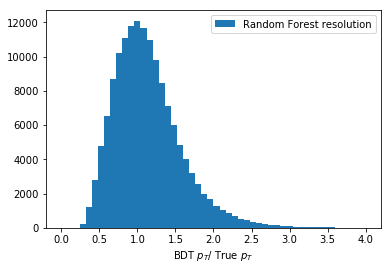

In [49]:
array1 = np.array(prediction_tree)
array2 = np.array(y_test)
norm_array1 = array1/array2
plt.hist(norm_array1, bins=50,label="Random Forest resolution", range=[0,4])
plt.xlabel("BDT $p_{T}$/ True $p_{T}$",  fontsize = 10)
plt.legend()

print(array1[0])
print(array2[0])
print (len(array1))
plt.savefig('resolution_forest.eps')
plt.show()

In [50]:
output = open('RandomF.txt','w')
 
for (x, y) in zip(array1, array2):
    output.write(str(round(x, 7))+' '+str(round(y,7))+'\n')
     
output.close()

In [51]:
import sklearn; print(sklearn.__version__)

0.19.0
